In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

path='/content/gdrive/My Drive/Temp/Assignment_1/'

In [4]:
reference=cv2.imread(path+'Q2_reference.jpg',0)
template=cv2.imread(path+'Q2_template.jpg',0)

(<matplotlib.image.AxesImage at 0x7fd33a53b160>, (-0.5, 385.5, 451.5, -0.5))

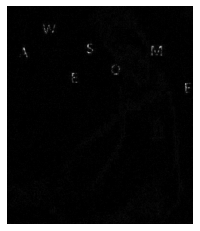

In [8]:
diff1=cv2.subtract(reference,template)
diff2=cv2.subtract(template,reference)
diff3=cv2.add(diff1,diff2)
plt.imshow(diff3,cmap='gray'),plt.axis('off')

(Text(0.5, 1.0, 'Histogram Equalization'), (0.0, 256.0))

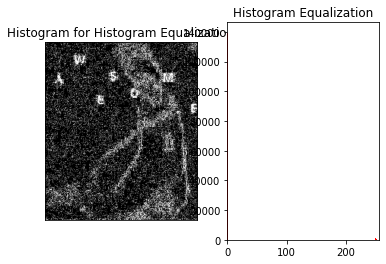

In [9]:
img_equ=cv2.equalizeHist(diff3)

plt.figure(2)
plt.subplot(1,2,1),plt.imshow(img_equ,cmap='gray')
plt.title('Histogram for Histogram Equalization'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.hist(img_equ.ravel(),256,[0,256],color='r')
plt.title('Histogram Equalization'),plt.xlim([0,256])

(<matplotlib.image.AxesImage at 0x7fd3386dba90>, (-0.5, 385.5, 451.5, -0.5))

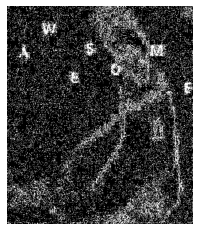

In [12]:
plt.imshow(img_equ,cmap='gray'),plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fd33834d240>, (-0.5, 385.5, 451.5, -0.5))

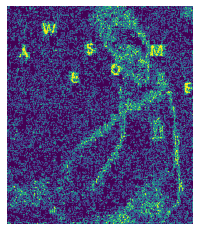

In [25]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 10,-1], 
                   [-1, -1, -1]])

# Sharpen image
improved_img = cv2.filter2D(img_equ, -1, kernel)
plt.imshow(improved_img), plt.axis("off")

(-0.5, 385.5, 451.5, -0.5)

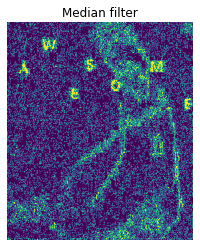

In [30]:
img_median=cv2.medianBlur(improved_img,1)
plt.imshow(img_median),plt.title('Median filter')
plt.axis('off')